In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!kaggle datasets download -d vivek468/superstore-dataset-final

Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
License(s): other
superstore-dataset-final.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip superstore-dataset-final.zip

Archive:  superstore-dataset-final.zip
replace Sample - Superstore.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data = pd.read_csv("/content/Sample - Superstore.csv", encoding='windows-1252')


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['Sales', 'Profit', 'Discount', 'Quantity']
data_scaled = scaler.fit_transform(data[features])


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_scaled)
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)


In [ ]:
kmeans = KMeans(n_clusters=4)
data['Cluster'] = kmeans.fit_predict(data_scaled)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Selecting the relevant features for clustering
features = ['Sales', 'Profit', 'Discount', 'Quantity']

# Scaling the data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Applying K-Means clustering with an initial guess of 3 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Calculating silhouette score to evaluate clustering performance
silhouette_avg = silhouette_score(data_scaled, data['Cluster'])

print(f'Cluster counts:\n{data["Cluster"].value_counts()}')
print(f'Silhouette Score: {silhouette_avg}')


Cluster counts:
Cluster
0    6788
2    3145
1      32
3      29
Name: count, dtype: int64
Silhouette Score: 0.3680538786386588


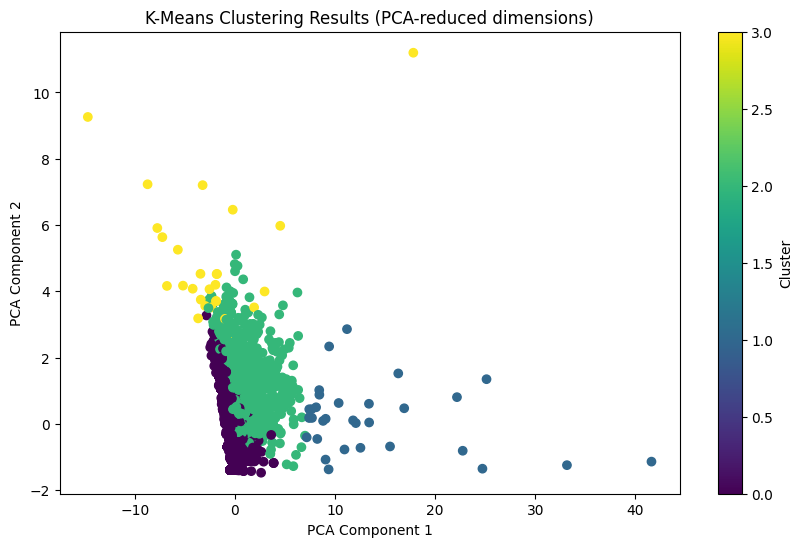

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Create a scatter plot for the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering Results (PCA-reduced dimensions)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Selecting the relevant features for clustering
features = ['Sales', 'Profit', 'Discount', 'Quantity']

# Scaling the data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Applying K-Means clustering with an initial guess of 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Calculating silhouette score to evaluate clustering performance
silhouette_avg = silhouette_score(data_scaled, data['Cluster'])

print(f'Cluster counts:\n{data["Cluster"].value_counts()}')
print(f'Silhouette Score: {silhouette_avg}')


Cluster counts:
Cluster
0    6795
2    3172
1      27
Name: count, dtype: int64
Silhouette Score: 0.3674599775513059


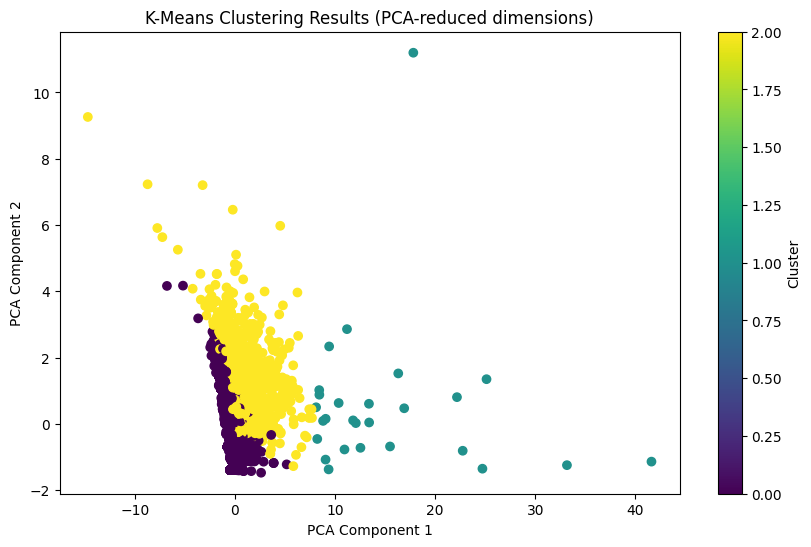

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Create a scatter plot for the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering Results (PCA-reduced dimensions)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


  Order Date  Ship Date  Shipping Time
0 2016-11-08 2016-11-11              3
1 2016-11-08 2016-11-11              3
2 2016-06-12 2016-06-16              4
3 2015-10-11 2015-10-18              7
4 2015-10-11 2015-10-18              7


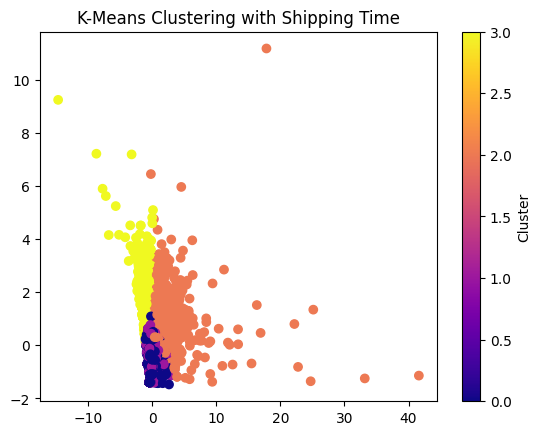

In [ ]:
# Ensure the date columns are in datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Calculate shipping time (in days)
data['Shipping Time'] = (data['Ship Date'] - data['Order Date']).dt.days

# Check the new column
print(data[['Order Date', 'Ship Date', 'Shipping Time']].head())

# Re-scale the data (including the new feature)
from sklearn.preprocessing import StandardScaler

features = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Time']  # Include Shipping Time
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Re-run KMeans with the new data
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the new clustering result
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster'], cmap='plasma')
plt.title('K-Means Clustering with Shipping Time')
plt.colorbar(label='Cluster')
plt.show()
